# Entscheidungsbäume (Decision Trees) 

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
np.random.seed(42)
num_samples = 1000

data = pd.DataFrame({
    "keyword_free": np.random.randint(0, 2, num_samples),
    "num_links": np.random.randint(0, 10, num_samples),
    "subject_lenght": np.random.randint(10, 50, num_samples),
    "num_special_chars": np.random.randint(0, 10, num_samples),
    "is_spam": np.random.randint(0,2, num_samples)
})

In [30]:
x = data.drop("is_spam", axis=1) # Merkmale
y = data["is_spam"] # Zielvariable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=42)

In [31]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
# Vorhersage aus dem Test
y_pred = model.predict(x_test)

# Evaluierung des Models
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Ausgabe der Evaluationsmetriken
print("Genauigkeit:", accuracy)
print("Konfusionsmatrix:\n", conf_matrix)
print("Klassifikationsbericht:\n", class_report)

Genauigkeit: 0.5366666666666666
Konfusionsmatrix:
 [[73 66]
 [73 88]]
Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.50      0.53      0.51       139
           1       0.57      0.55      0.56       161

    accuracy                           0.54       300
   macro avg       0.54      0.54      0.54       300
weighted avg       0.54      0.54      0.54       300



In [33]:
print(type(accuracy_score))


<class 'function'>


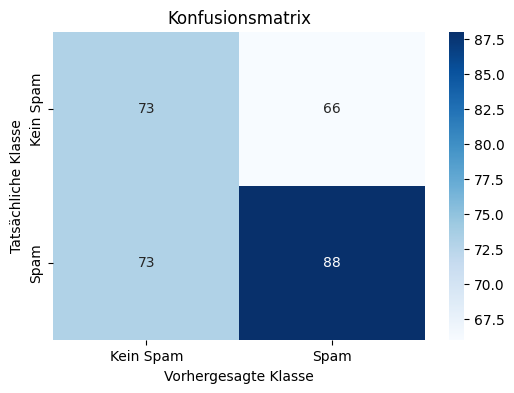

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Kein Spam", "Spam"], yticklabels=["Kein Spam", "Spam"])
plt.xlabel("Vorhergesagte Klasse")
plt.ylabel("Tatsächliche Klasse")
plt.title("Konfusionsmatrix")
plt.show()


🚀 Accuracy Score: 0.5867

Confusion Matrix:
[[138   1]
 [123  38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.99      0.69       139
           1       0.97      0.24      0.38       161

    accuracy                           0.59       300
   macro avg       0.75      0.61      0.53       300
weighted avg       0.77      0.59      0.52       300



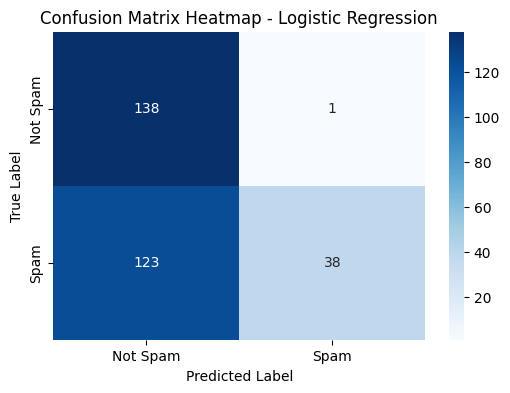

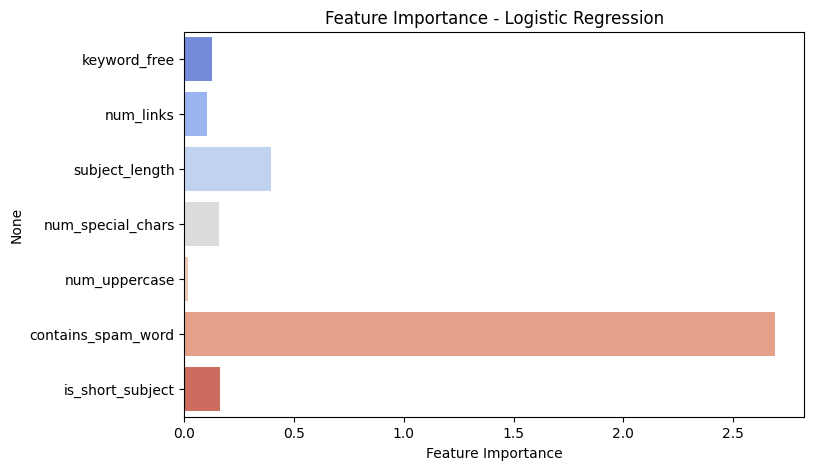

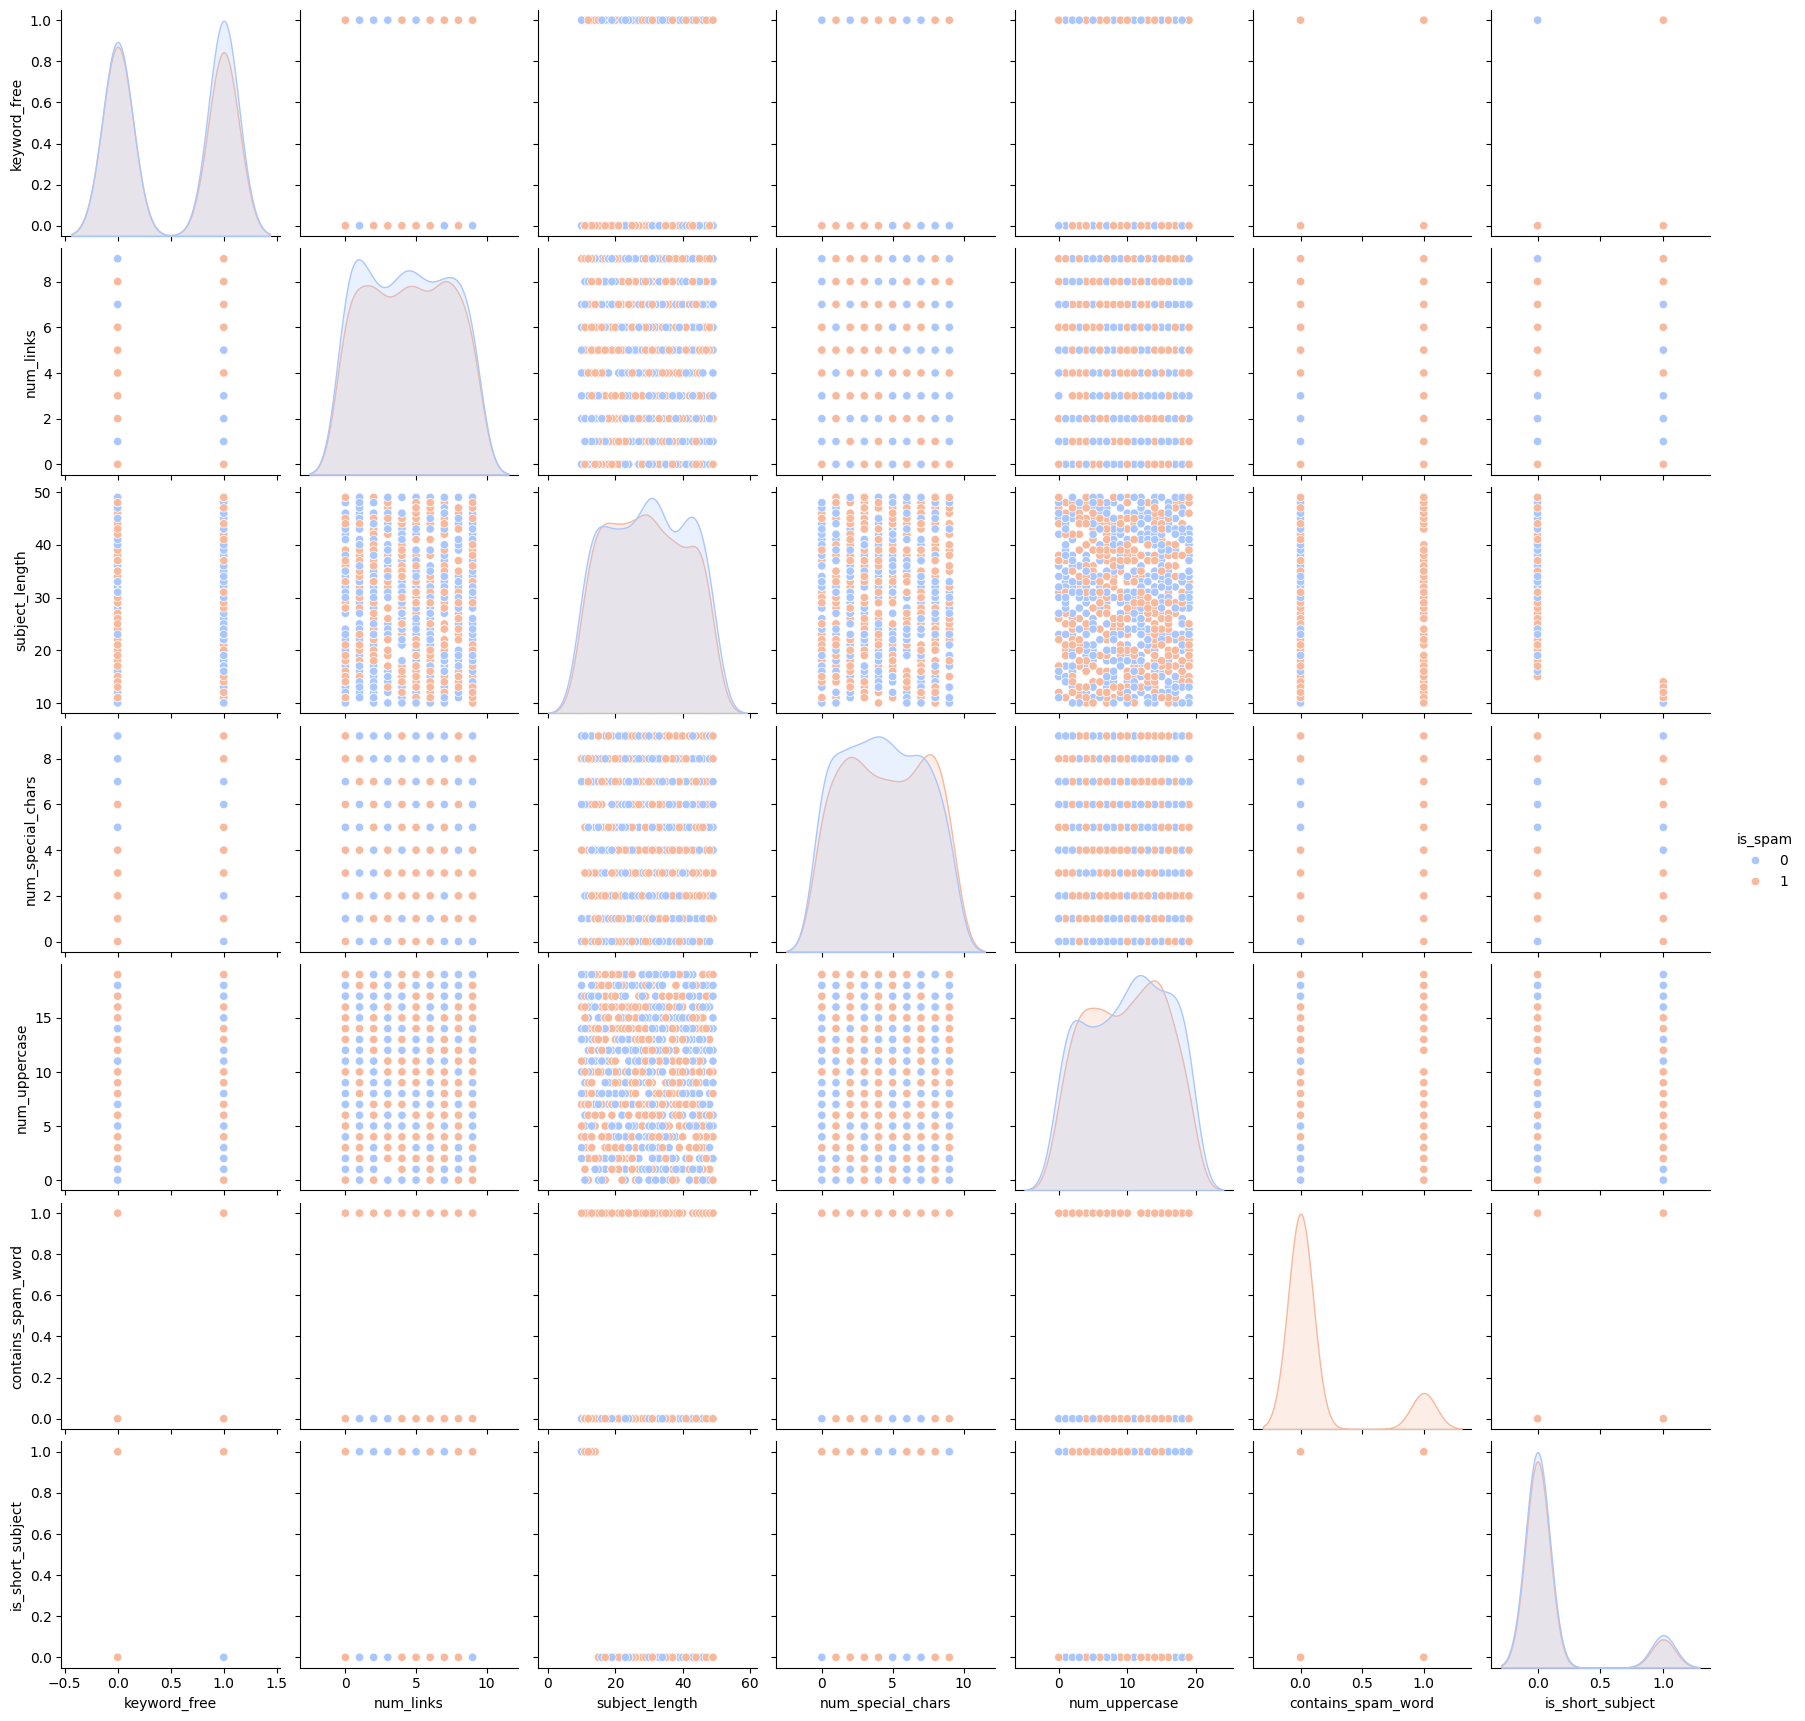

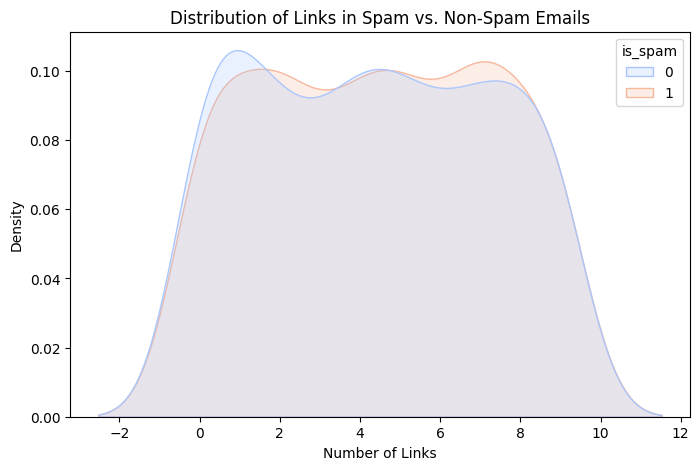

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Zufallszahlen für Reproduzierbarkeit
np.random.seed(42)
num_samples = 1000

# Datensatz erstellen
data = pd.DataFrame({
    "keyword_free": np.random.randint(0, 2, num_samples),
    "num_links": np.random.randint(0, 10, num_samples),
    "subject_length": np.random.randint(10, 50, num_samples),
    "num_special_chars": np.random.randint(0, 10, num_samples),
    "is_spam": np.random.randint(0, 2, num_samples)
})

# **Reduzierte Feature-Auswahl (keine künstlichen Kombinationen)**
data["num_uppercase"] = np.random.randint(0, 20, num_samples)  # Anzahl Großbuchstaben
data["contains_spam_word"] = (data["is_spam"] & (np.random.rand(num_samples) < 0.15)).astype(int)  # 15% Spam-Wörter
data["is_short_subject"] = (data["subject_length"] < 15).astype(int)  # Sehr kurzer Betreff = Spam?

# **Feature-Normalisierung mit MinMaxScaler**
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(data.drop("is_spam", axis=1)), columns=data.drop("is_spam", axis=1).columns)
y = data["is_spam"]

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Einfacheres Modell: Logistische Regression (statt Gradient Boosting)**
model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train, y_train)

# Vorhersage
y_pred = model.predict(X_test)

# Metriken berechnen
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

# Ergebnisse ausgeben
print(f"🚀 Accuracy Score: {accuracy:.4f}")  # Sollte stabiler sein
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification)

# **Konfusionsmatrix als Heatmap**
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap - Logistic Regression")
plt.show()

# **Feature-Importanz visualisieren**
feature_importances = abs(model.coef_[0])  # Logistische Regression gibt Koeffizienten zurück
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=features, hue=features, dodge=False, palette="coolwarm")
plt.legend([], [], frameon=False)
plt.xlabel("Feature Importance")
plt.title("Feature Importance - Logistic Regression")
plt.show()

# **Pairplot zur Visualisierung der Datenverteilung**
sns.pairplot(data, hue="is_spam", palette="coolwarm", diag_kind="kde")
plt.show()

plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x="num_links", hue="is_spam", fill=True, common_norm=False, palette="coolwarm")
plt.xlabel("Number of Links")
plt.ylabel("Density")
plt.title("Distribution of Links in Spam vs. Non-Spam Emails")
plt.show()


🚀 Accuracy Score: 0.5633

Confusion Matrix:
[[96 43]
 [88 73]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.69      0.59       139
           1       0.63      0.45      0.53       161

    accuracy                           0.56       300
   macro avg       0.58      0.57      0.56       300
weighted avg       0.58      0.56      0.56       300



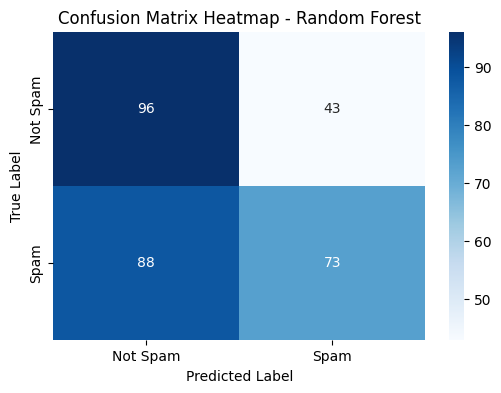

C:\Users\konst\AppData\Local\Temp\ipykernel_18808\2790591244.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="coolwarm")


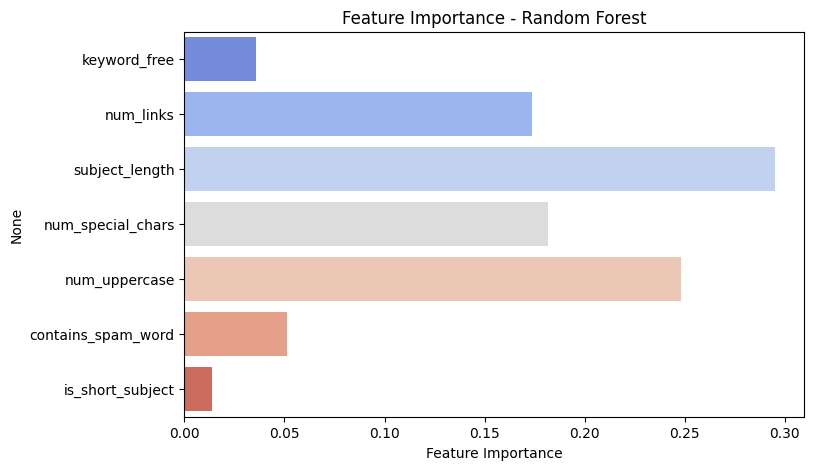

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Zufallszahlen für Reproduzierbarkeit
np.random.seed(42)
num_samples = 1000

# Datensatz erstellen
data = pd.DataFrame({
    "keyword_free": np.random.randint(0, 2, num_samples),
    "num_links": np.random.randint(0, 10, num_samples),
    "subject_length": np.random.randint(10, 50, num_samples),
    "num_special_chars": np.random.randint(0, 10, num_samples),
    "is_spam": np.random.randint(0, 2, num_samples)
})

# Zusätzliche Features
data["num_uppercase"] = np.random.randint(0, 20, num_samples)
data["contains_spam_word"] = (data["is_spam"] & (np.random.rand(num_samples) < 0.15)).astype(int)
data["is_short_subject"] = (data["subject_length"] < 15).astype(int)

# Feature-Normalisierung
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(data.drop("is_spam", axis=1)), columns=data.drop("is_spam", axis=1).columns)
y = data["is_spam"]

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modell: RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Vorhersage
y_pred = model.predict(X_test)

# Metriken berechnen
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

# Ergebnisse ausgeben
print(f"🚀 Accuracy Score: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification)

# Konfusionsmatrix als Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap - Random Forest")
plt.show()

# Feature Importance visualisieren
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=features, palette="coolwarm")
plt.xlabel("Feature Importance")
plt.title("Feature Importance - Random Forest")
plt.show()
